In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
player=pd.read_csv('players_22.csv')
player.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_12716\1183119623.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  player=pd.read_csv('players_22.csv')


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [3]:
features=["overall","potential","value_eur","wage_eur","age"]
player=player.dropna(subset=features)
data=player[features].copy()
data.head()

,overall,potential,value_eur,wage_eur,age
0,93,93,78000000.0,320000.0,34
1,92,92,119500000.0,270000.0,32
2,91,91,45000000.0,270000.0,36
3,91,91,129000000.0,270000.0,29
4,91,91,125500000.0,350000.0,30


In [4]:
data.describe()

,overall,potential,value_eur,wage_eur,age
count,19165.000000,19165.000000,1.916500e+04,19165.000000,19165.000000
mean,65.760188,71.079990,2.850452e+06,9021.721889,25.190034
std,6.882803,6.087721,7.613700e+06,19476.005074,4.727515
min,47.000000,49.000000,9.000000e+03,500.000000,16.000000
25%,61.000000,67.000000,4.750000e+05,1000.000000,21.000000
50%,66.000000,71.000000,9.750000e+05,3000.000000,25.000000
75%,70.000000,75.000000,2.000000e+06,8000.000000,29.000000
max,93.000000,95.000000,1.940000e+08,350000.000000,43.000000


# The next steps we need to follow are:
1. We will need to scale our data
2. We then initialize random centroids
3. Label each data point
4. Update centroids
5. Repeat step 3 and 4 until centroids stop changing

In [5]:
#We will use MinMax Scaling
data=(data-data.min())/(data.max()-data.min())*9+1
data.describe()

,overall,potential,value_eur,wage_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,4.670472,5.319998,1.131826,1.219443,4.063345
std,1.346635,1.191076,0.353229,0.501528,1.575838
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.739130,4.521739,1.021620,1.012876,2.666667
50%,4.717391,5.304348,1.044817,1.064378,4.000000
75%,5.500000,6.086957,1.092370,1.193133,5.333333
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [6]:
data.head()

,overall,potential,value_eur,wage_eur,age
0,10.000000,9.608696,4.618307,9.227468,7.000000
1,9.804348,9.413043,6.543654,7.939914,6.333333
2,9.608696,9.217391,3.087308,7.939914,7.666667
3,9.608696,9.217391,6.984396,7.939914,5.333333
4,9.608696,9.217391,6.822018,10.000000,5.666667


In [7]:
# Initialize our random centroids
def random_centroids(data,k):
    centroids=[]
    for i in range(k):
        centroid=data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids,axis=1)

In [8]:
centroids=random_centroids(data,5)
centroids

,0,1,2,3,4
overall,4.521739,7.065217,7.065217,6.282609,4.913043
potential,5.108696,5.695652,6.282609,4.717391,3.347826
value_eur,1.022779,1.033218,1.012341,1.033218,1.073813
wage_eur,1.038627,1.038627,1.038627,1.012876,1.012876
age,3.333333,4.666667,5.333333,5.666667,6.000000


In [9]:
def get_labels(data,centroids):
    distances=centroids.apply(lambda x:np.sqrt(((data-x)**2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [10]:
labels=get_labels(data,centroids)
labels.value_counts()

0    10611
4     2993
3     2346
1     1631
2     1584
dtype: int64

In [11]:
def new_centroids(data,labels,k):
    return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

In [12]:
from sklearn.decomposition import PCA
from IPython.display import clear_output

In [13]:
def plot_clusters(data,labels,centroids,iteration):
    pca=PCA(n_components=2)
    data_2d=pca.fit_transform(data)
    centroids_2d=pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration{iteration}')
    plt.scatter(x=data_2d[:,0],y=data_2d[:,1],c=labels)
    plt.scatter(x=centroids_2d[:,0],y=centroids_2d[:,1])
    plt.show()

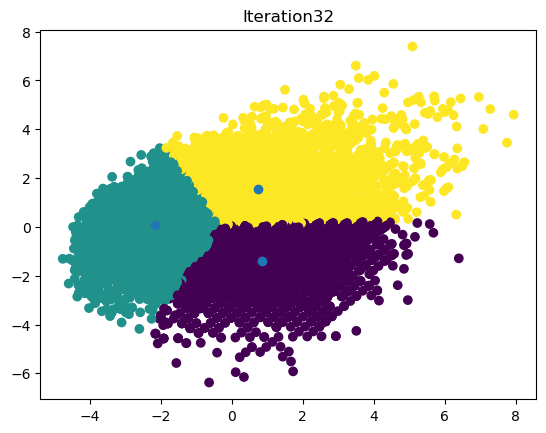

In [25]:
max_iterations=100
k=3


centroids=random_centroids(data,k)
old_centroids=pd.DataFrame()
iteration=1

while iteration<max_iterations and not centroids.equals(old_centroids):
    old_centroids=centroids
    
    
    
    labels=get_labels(data,centroids)
    centroids=new_centroids(data,labels,k)
    plot_clusters(data,labels,centroids,iteration)
    iteration+=1

In [26]:
centroids

,0,1,2
overall,4.784633,3.206838,5.806043
potential,4.506962,4.928473,6.497993
value_eur,1.044980,1.026614,1.285501
wage_eur,1.118904,1.028505,1.420001
age,5.472247,2.518708,3.596161


In [29]:
from sklearn.cluster import KMeans
kmeans=KMeans(3)
kmeans.fit(data)
centroids=kmeans.cluster_centers_
pd.DataFrame(centroids,columns=features).T

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,0,1,2
overall,4.801187,3.600608,6.232103
potential,4.504153,5.206271,6.624469
value_eur,1.040026,1.035823,1.414008
wage_eur,1.112969,1.039969,1.657593
age,5.609176,2.712661,4.140303


In [24]:
player[labels==2][['short_name']+features]

,short_name,overall,potential,value_eur,wage_eur,age
0,L. Messi,93,93,78000000.0,320000.0,34
1,R. Lewandowski,92,92,119500000.0,270000.0,32
2,Cristiano Ronaldo,91,91,45000000.0,270000.0,36
3,Neymar Jr,91,91,129000000.0,270000.0,29
4,K. De Bruyne,91,91,125500000.0,350000.0,30
...,...,...,...,...,...,...
6309,Patrick William,69,77,2900000.0,4000.0,24
6311,P. Cornud,69,75,2100000.0,4000.0,24
6376,M. Al-Tamari,69,75,2200000.0,7000.0,24
6396,Carles Soria,69,75,2100000.0,3000.0,24
